In [47]:
# Importing

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

# KNN Classification

In [118]:
# Loading the Iris dataset

iris = load_iris()
X = iris.data[:, 2:] # Selecting the two last columns
y = iris.target

target_names = iris.target_names
features_names = iris.feature_names

In [ ]:
# Suppose we are out in the wild and find three new specimens

X_new = np.array([[3.0, 0.90],
                  [7.0, 1.75],
                  [1.2, 1.00]
                 ])

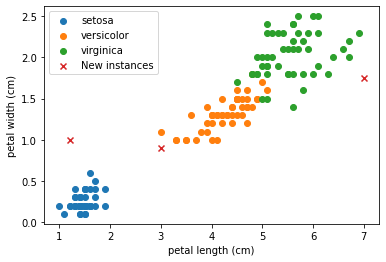

In [53]:
# Plotting

plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label=target_names[0])
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.scatter(X_new[:, 0], X_new[:, 1], marker='x', label='New instances')
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.legend()
plt.show()

In [ ]:
# We expect our predicts to be: [1, 2, 0]

In [177]:
def knn(X_new, X, y, k=5):
    """Predict a KNN Classification. 
    X_new are the instances to be predicted,
    X, y are the features and targets used for training,
    k is the number of neighbors.
    Return a predict array.
    """
    
    M = X.shape[0]                    # Get the number of instances in the training set
    N = X_new.shape[0]                # Get the number of instances to be predicted
    
    y_pred = np.zeros(N)              # Our predictions will be stored here
    
    for j in range(N):                # Loop to predict all X_new[j] instances given
        distances = np.zeros(M)       # Distances are to be stored here

        for i in range(M):            # Loop to get the distances from instance X_new[j] to all the training X
            distances[i] = np.linalg.norm((X_new[j] - X[i])) # Euclidean distance

        sorted_indexes = np.argsort(distances)     # Get the indexes from sorted distances (low to high)

        k_indexes = sorted_indexes[:k]             # Get the k-th first (k-closest instances)
        k_labels = y[k_indexes]                    # Get the labels from k-closests  

        label, count = np.unique(k_labels, return_counts=True)  # Count the labels from k-closest
        y_pred[j] = label[count.argmax()]                       # Assign the most frequent label  
    
    return y_pred

In [69]:
# As expected ...

y_pred = knn(X_new, X, y, k=5)
y_pred

array([1., 2., 0.])

In [150]:
# Compare with Sklearn's version

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X, y)
knn_clf.predict(X_new)

array([1, 2, 0])

In [178]:
# Lets compare the metrics from the training

y_pred_frank = knn(X, X, y, k=5)

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X, y)
y_pred_sklearn = knn_clf.predict(X)

print(classification_report(y, y_pred_frank))
print('----------------------------------------------------------------')
print(classification_report(y, y_pred_sklearn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



In [ ]:
# Same result.

In [170]:
# Making a Voronoi plot

# Build feature space

x_space = np.linspace(0.8, 7.1, 150)
y_space = np.linspace(0.0, 2.7, 150)

xx, yy = np.meshgrid(x_space, y_space)

X_space = np.c_[xx.ravel(), yy.ravel()]

# Predict all points in the grid

y_pred_frank = knn(X_space, X, y, k=5)

knn_clf = KNeighborsClassifier(n_neighbors=5,  
                               metric='euclidean',
                               algorithm='brute'
                              )
knn_clf.fit(X, y)
y_pred_sklearn = knn_clf.predict(X_space)

In [171]:
# Performance is significantly slower when compared to the sklearn one

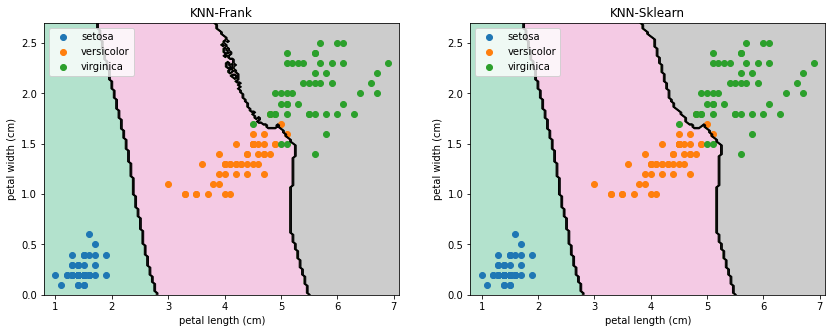

In [173]:
# Plotting

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.contourf(xx, yy, y_pred_frank.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), cmap='Pastel2')
plt.contour(xx, yy, y_pred_frank.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), linewidths=1, colors='k')
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label=target_names[0])
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.xlim(0.8, 7.1)
plt.ylim(0.0, 2.7)
plt.title('KNN-Frank')
plt.legend()

plt.subplot(1,2,2)
plt.contourf(xx, yy, y_pred_sklearn.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), cmap='Pastel2')
plt.contour(xx, yy, y_pred_sklearn.reshape(xx.shape), extent=(0.8, 7.1, 0.0, 2.7), linewidths=1, colors='k')
plt.scatter(X[y == 0][:,0], X[y == 0][:,1], label=target_names[0])
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.xlim(0.8, 7.1)
plt.ylim(0.0, 2.7)
plt.title('KNN-Sklearn')
plt.legend()

plt.show()

In [174]:
# Pretty similar, but with some noise on the boundaries

# KNN Regression

In [226]:
data = pd.read_csv('data/iq-brain.csv')

# Some cleaning

data[['AREA', 'CCSA', 'CIRC', 'WT']] = data.loc[:,['AREA', 'CCSA', 'CIRC', 'WT']].apply(
    lambda x: x.str.replace(',', '.'))

cat_cols = ['PAIR', 'SEX (1=M)', 'ORDER']
num_cols = ['IQ', 'VOL', 'AREA', 'CCSA', 'CIRC', 'WT']

data[cat_cols] = data[cat_cols].astype('object')
data[num_cols] = data[num_cols].astype('float32')

In [282]:
data.corr()['IQ'].sort_values(ascending=False)

IQ      1.000000
CCSA    0.156252
CIRC    0.137839
WT     -0.002702
VOL    -0.063392
AREA   -0.291319
Name: IQ, dtype: float64

In [ ]:
data.corr()

In [ ]:
# Lets use CCSA (Cortex Cross section area) and AREA

In [227]:
# Some cleaning

X['WT'] = X['WT'].apply(lambda x: x.replace(',', '.')).astype('float32')
X = X.to_numpy()


<ipython-input-227-b172bfda1e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['WT'] = X['WT'].apply(lambda x: x.replace(',', '.')).astype('float32')


In [ ]:


y = data['IQ'].to_numpy()

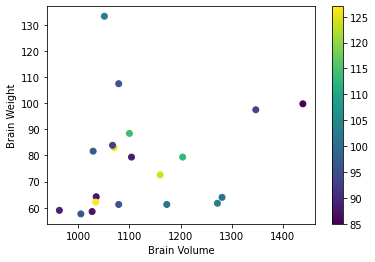

In [229]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel('Brain Volume')
plt.ylabel('Brain Weight')
plt.colorbar()
plt.show()

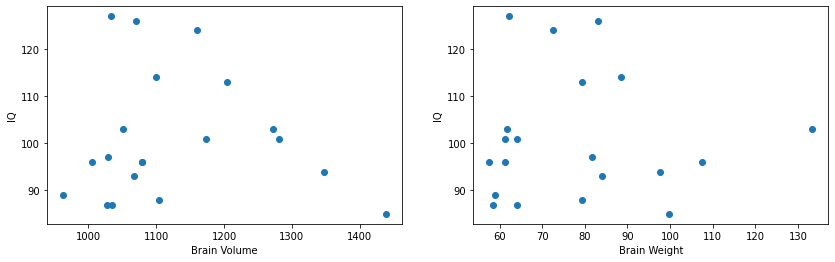

In [233]:
plt.figure(figsize=(14,4))

plt.subplot(1,2,1)
plt.scatter(X[:,0], y)
plt.xlabel('Brain Volume')
plt.ylabel('IQ')

plt.subplot(1,2,2)
plt.scatter(X[:,1], y)
plt.xlabel('Brain Weight')
plt.ylabel('IQ')

plt.show()

In [ ]:
def knn_regressor(X_new, X, y, k=5):
    """Do a KNN Regression prediction. 
    X_new are the instances to be predicted,
    X, y are the features and targets used for training,
    k is the number of neighbors.
    Return a predict array.
    """
    
    M = X.shape[0]                    # Get the number of instances in the training set
    N = X_new.shape[0]                # Get the number of instances to be predicted
    
    y_pred = np.zeros(N)              # Our predictions will be stored here
    
    for j in range(N):                # Loop to predict all X_new[j] instances given
        distances = np.zeros(M)       # Distances are to be stored here

        for i in range(M):            # Loop to get the distances from instance X_new[j] to all the training X
            distances[i] = np.linalg.norm((X_new[j] - X[i])) # Euclidean distance

        sorted_indexes = np.argsort(distances)     # Get the indexes from sorted distances (low to high)

        k_indexes = sorted_indexes[:k]             # Get the k-th first (k-closest instances)
        k_labels = y[k_indexes]                    # Get the labels from k-closests  

        label, count = np.unique(k_labels, return_counts=True)  # Count the labels from k-closest
        y_pred[j] = label[count.argmax()]                       # Assign the most frequent label  
    
    return y_pred

In [ ]:
X_new = np.array([[1150.0, 81.0],
                  []
                 ])

In [ ]:
M = X.shape[0]                    # Get the number of instances in the training set
N = X_new.shape[0]                # Get the number of instances to be predicted

y_pred = np.zeros(N)              # Our predictions will be stored here

for j in range(N):                # Loop to predict all X_new[j] instances given
    distances = np.zeros(M)       # Distances are to be stored here

    for i in range(M):            # Loop to get the distances from instance X_new[j] to all the training X
        distances[i] = np.linalg.norm((X_new[j] - X[i])) # Euclidean distance

    sorted_indexes = np.argsort(distances)     # Get the indexes from sorted distances (low to high)

    k_indexes = sorted_indexes[:k]             # Get the k-th first (k-closest instances)
    k_labels = y[k_indexes]                    # Get the labels from k-closests  

    label, count = np.unique(k_labels, return_counts=True)  # Count the labels from k-closest
    y_pred[j] = label[count.argmax()]

In [176]:
# Useful tips for KNN

#
#
#